In [1]:
import numpy as np
import pandas as pd
# from shapely.geometry import Point, shape, LineString, mapping, MultiPoint
import seaborn
import geopandas as gpd
import pysal
import mapclassify
import matplotlib.pyplot as plt
from pysal.explore import esda
from pysal.lib import weights
import time
import random
import matplotlib.pyplot as plt
from shapely import wkt

from esda.moran import Moran
from libpysal.weights import Queen, KNN
import seaborn
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import robust_scale


/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/cg/alpha_shapes.py:38: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/libpysal/cg/alpha_shapes.py:164: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python

In [2]:
socialattr_pth = r"/Users/yuhan/Desktop/paper——revision/FLCounty_JEPR/ACS_County_2000_2019_JPER/National Risk Index/NRI_Shapefile_Counties/NRI_Shapefile_Counties.shp"
#socialattrreader = pd.read_csv( socialattr_pth )
socialattrreader = gpd.read_file( socialattr_pth )
#socialattrreader.crs = 'epsg:4326'
#socialattrreader = socialattrreader.to_crs({'init':'epsg:2163'})

In [3]:
socialattrreader = socialattrreader.to_crs({'init':'epsg:4326'})
socialattrreader.total_bounds
xmin, ymin, xmax, ymax = [-125.78, 22.25, -65.62, 50.48]

print( xmin, ymin, xmax, ymax )
socialattrreader = socialattrreader.cx[xmin:xmax, ymin:ymax]

/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


-125.78 22.25 -65.62 50.48


In [4]:
print(socialattrreader.head())
print(socialattrreader.geometry.head())

   NRI_ID    STATE STATEABBRV STATEFIPS   COUNTY COUNTYTYPE COUNTYFIPS  \
0  C01001  Alabama         AL        01  Autauga     County        001   
1  C01003  Alabama         AL        01  Baldwin     County        003   
2  C01005  Alabama         AL        01  Barbour     County        005   
3  C01007  Alabama         AL        01     Bibb     County        007   
4  C01009  Alabama         AL        01   Blount     County        009   

  STCOFIPS  POPULATION    BUILDVALUE  ...     WNTW_ALRP     WNTW_ALRA  \
0    01001       58764  9.123274e+09  ...  7.410082e-09  8.725777e-06   
1    01003      231365  4.596848e+10  ...  2.287120e-08  1.548360e-07   
2    01005       25160  4.847697e+09  ...  2.347236e-08  7.606598e-07   
3    01007       22239  3.146947e+09  ...  1.270300e-08  1.202015e-05   
4    01009       58992  7.815620e+09  ...  1.482016e-08  2.002965e-07   

   WNTW_ALR_N    WNTW_RISKV WNTW_RISKS      WNTW_RISKR     NRI_VER  \
0   10.461158   8494.906508  12.217626        

In [5]:

#print(socialattrreader.shape)
#socialattrreader = socialattrreader[~socialattrreader["STATE"].isin(['Hawaii','Alaska', 'American Samoa', 'Guam', 
#                                                                          'Puerto Rico', 'Virgin Islands',
#                                                                          'Northern Mariana Islands'])]

(3231, 467)


In [5]:

#print(socialattrreader.shape)
print( socialattrreader.columns ) # (0.5, 0.5)


Index(['NRI_ID', 'STATE', 'STATEABBRV', 'STATEFIPS', 'COUNTY', 'COUNTYTYPE',
       'COUNTYFIPS', 'STCOFIPS', 'POPULATION', 'BUILDVALUE',
       ...
       'WNTW_ALRP', 'WNTW_ALRA', 'WNTW_ALR_N', 'WNTW_RISKV', 'WNTW_RISKS',
       'WNTW_RISKR', 'NRI_VER', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object', length=467)


In [6]:



socialattrreader = socialattrreader[ ['STATE', 'STATEABBRV', 'COUNTY', 'COUNTYTYPE', 
                   'STCOFIPS', 'POPULATION', 'BUILDVALUE', 'AGRIVALUE',
                   'RISK_VALUE', 'SOVI_SCORE', 'RESL_VALUE', 'geometry'
                   ] ]

socialattrreader['x']           = socialattrreader.centroid.x
socialattrreader['y']           = socialattrreader.centroid.y
socialattrreader['centroid']    = socialattrreader.centroid



/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_91524/1210040718.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  socialattrreader['x']           = socialattrreader.centroid.x
/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_91524/1210040718.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  socialattrreader['y']           = socialattrreader.centroid.y
/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_91524/1210040718.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  socialattrreader['centroid']    = socialattrreader.centroid


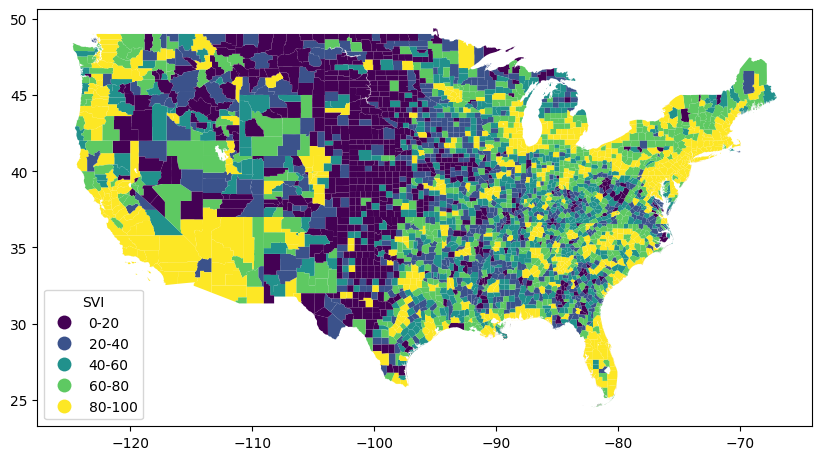

In [7]:
socialattrreader.plot(
                column="POPULATION",
                scheme="Quantiles",
                legend=True,
                legend_kwds={"loc": "lower left", 
                                'title': "SVI",
                                "labels" : ["0-20", "20-40", 
                                "40-60", "60-80", "80-100"] ,
                                #"bbox_to_anchor": (1.0, 0.1),
                                'fontsize': 10
                                },
                figsize=(10, 10),
                linewidth=0.8 )
plt.show()

In [8]:
HMA_pth = r"/Users/yuhan/Desktop/paper——revision/HMA_nPMD.csv"
HMAData = pd.read_csv(HMA_pth)

print( HMAData["County FIPS"] )

HMAData['FIPS'] = HMAData['County FIPS'].apply(str)

HMAData_multiple = HMAData.groupby(['FIPS', 'State Name', 'County Name', 'Year']).agg({
                    'disasterNumber'                    :  'count',
                    'projectAmount'                     :  ['sum'], 
                    'federalShareObligated'             :  ['sum'], 
                    'subrecipientAdminCostAmt'          :  ['sum'], 
                    'srmcObligatedAmt'                  :  ['sum'], 

                    'srmcObligatedAmt'                  :  ['sum'], 
                    'recipientAdminCostAmt'             :  ['sum'], 
                    'numberOfFinalProperties'           :  ['sum'],
                    'numberOfProperties'                :  ['sum'],
                    'duration_years'                    :  ['max'],
                    'duration'                          :  ['mean'],
                    'Hazard'                            :  ', '.join ,
                    
                    'CropDmg'                           :  ['sum'], 
                    'CropDmg(ADJ 2021)'                 :  ['sum'],
                    'CropDmgPerCapita(ADJ 2021)'        :  ['sum'],
                    'PropertyDmg'                       :  ['sum'],
                    'PropertyDmg(ADJ 2021)'             :  ['sum'],
                    'PropertyDmgPerCapita(ADJ 2021)'    :  ['sum'],
                    'Injuries'                          :  ['sum'],
                    'InjuriesPerCapita'                 :  ['sum'],
                    'Fatalities'                        :  ['sum'],
                    'FatalitiesPerCapita'               :  ['sum'],
                    'Duration_Days'                     :  ['max'],
                    'Fatalities_Duration'               :  ['max'],
                    'Injuries_Duration'                 :  ['max'],
                    'Property_Damage_Duration'          :  ['max'],
                    'Crop_Damage_Duration'              :  ['max']  }).reset_index()

HMAData_multiple.columns = HMAData_multiple.columns.droplevel(1)


HMAData_multiple.rename(columns={'FIPS': 'fips', 'State Name': 'State Name',  
                                 'County Name': 'County Name', 'Year': 'Year',
                                   'projectAmount'                     :  'HMAprojAmot', 
                                   'federalShareObligated'             :  'HMAfedShaOb', 
                                   'subrecipientAdminCostAmt'          :  'subreciptAdm', 
                                   'srmcObligatedAmt'                  :  'srmcOblgdAmt', 
                                   'recipientAdminCostAmt'             :  'AdminCostAmt', 
                                   'numberOfFinalProperties'           :  'NumfinalProp',
                                   'numberOfProperties'                :  'NumProperty'
                                   }, inplace=True)

HMAData_multiple = HMAData_multiple.loc[ HMAData_multiple['Year'] > 2000 ]


0          1001
1          1001
2          1001
3          1001
4          1001
          ...  
281317    56045
281318    56045
281319    56045
281320    56045
281321    56045
Name: County FIPS, Length: 281322, dtype: int64


In [9]:
SBAHome_pth = r"/Users/yuhan/Desktop/paper——revision/FLCounty_JEPR/ACS_County_2000_2019_JPER/County_SBAHome.csv"
SBAHomereader = pd.read_csv( SBAHome_pth )
print( SBAHomereader.columns )

SBAHome_agg = SBAHomereader.groupby([ 'fips', 'State Name', 'County Name', 'Year' ]).agg({
                                    'Count_h' :  ['sum'], 'ApprovedLoan_h' :  ['sum']  }).reset_index()

SBAHome_agg.columns = SBAHome_agg.columns.droplevel(1)

SBAHome_agg.rename(columns={ 'fips': 'fips', 'disasternumber': 'disasterNumber', 
                             'State Name': 'State Name',  'County Name': 'County Name', 
                             'Year': 'Year', 'Month': 'Month', 'incidentdate_x': 'incidentdate', 
                             'sheldusdateplace': 'sheldusdateplace', 'ApprovedLoan_h': 'ApprovLoan_h'   }, inplace=True)

SBAHome_agg = SBAHome_agg.loc[ SBAHome_agg['Year'] > 2000 ]

Index(['fips', 'Year_a', 'disasternumber', 'Count_h', 'ApprovedLoan_h',
       'index', 'disasterNumber', 'fyDeclared', 'disasterType', 'incidentType',
       'duration', 'incidentdate_x', 'incidentdateplace', 'State Name',
       'County Name', 'County FIPS', 'Year', 'Month', 'incidentdate_y',
       'sheldusdateplace', 'Hazard', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'PropertyDmg(ADJ 2021)',
       'PropertyDmgPerCapita(ADJ 2021)', 'Injuries', 'InjuriesPerCapita',
       'Fatalities', 'FatalitiesPerCapita', 'Duration_Days',
       'Fatalities_Duration', 'Injuries_Duration', 'Property_Damage_Duration',
       'Crop_Damage_Duration'],
      dtype='object')


In [10]:
SBAbusiness_pth = r"/Users/yuhan/Desktop/paper——revision/FLCounty_JEPR/ACS_County_2000_2019_JPER/County_SBAbusiness.csv"
# 2000000
SBAbusinessreader = pd.read_csv( SBAbusiness_pth )
start_time = time.time()
print( SBAbusinessreader.columns )

SBABusiness_agg = SBAbusinessreader.groupby([ 'fips', 'State Name', 'County Name', 'Year' ]).agg({
                                            'Count_b'          :  ['sum'], 
                                            'ApprovedLoan_b'   :  ['sum'] 
                                            }).reset_index()

SBABusiness_agg.columns = SBABusiness_agg.columns.droplevel(1)

SBABusiness_agg.rename(columns={'fips': 'fips', 'State Name': 'State Name',
                            'County Name': 'County Name', 'Year': 'Year', 'ApprovedLoan_b': 'ApprovLoan_b'
                            }, inplace=True)

SBABusiness_agg.columns
SBABusiness_agg = SBABusiness_agg.loc[ SBABusiness_agg['Year'] > 2000 ]

Index(['fips', 'Year_a', 'disasternumber', 'Count_b', 'ApprovedLoan_b',
       'index', 'disasterNumber', 'fyDeclared', 'disasterType', 'incidentType',
       'duration', 'incidentdate_x', 'incidentdateplace', 'State Name',
       'County Name', 'County FIPS', 'Year', 'Month', 'incidentdate_y',
       'sheldusdateplace', 'Hazard', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'PropertyDmg(ADJ 2021)',
       'PropertyDmgPerCapita(ADJ 2021)', 'Injuries', 'InjuriesPerCapita',
       'Fatalities', 'FatalitiesPerCapita', 'Duration_Days',
       'Fatalities_Duration', 'Injuries_Duration', 'Property_Damage_Duration',
       'Crop_Damage_Duration'],
      dtype='object')


In [11]:
PRM_pth = r"/Users/yuhan/Desktop/paper——revision/FLCounty_JEPR/PublicRiskMitigation_SHELDUS.csv"
PRMData = pd.read_csv(PRM_pth)

print( PRMData.incidentTypePA.unique() )
print( PRMData.FIPS.dtype )

#print( PRMData.iloc[2], sep="/n")

PRMData_agg = PRMData.groupby([ 'FIPS', 'State Name', 'County Name', 'Year' ]).agg({
                                            'DamageHAO'         :  ['sum'], 
                                            'CountHAO'          :  ['sum'] ,
                                            'HAOAproved'        :  ['sum'] ,
                                            'RepaReplHAO'       :  ['sum'] ,
                                            'HAORental'         :  ['sum'] ,
                                            'HAOOther'          :  ['sum'] ,
                                            'CountHAR'          :  ['sum'] ,
                                            'HARAproved'        :  ['sum'] ,
                                            'RepaReplHAR'       :  ['sum'] ,
                                            'HARRental'         :  ['sum'] ,
                                            'HAROther'          :  ['sum'] ,
                                            'PAprojectAmount'   :  ['sum'] ,
                                            'PAfederalshare'    :  ['sum'] ,
                                            'PAtotaloblig'      :  ['sum']                                             }).reset_index()
PRMData_agg.columns = PRMData_agg.columns.droplevel(1)


PRMData_agg.rename(columns={'FIPS': 'fips', 
                            'disasterNumber': 'disasterNumber', 'State Name': 'State Name',
                            'County Name': 'County Name', 'Year': 'Year', 
                            'DamageHAO': 'HAODamage', 'CountHAO': 'HAOCount',
                            'HAOAproved': 'HAOAproved', 'RepaReplHAO': 'HAORepaRepl',
                            'CountHAR': 'HARCount', 'RepaReplHAR': 'HARRepaRepl',
                            'PAprojectAmount': 'PAprojectAmt', 'PAfederalshare': 'PAfedshare',
                            'PAtotaloblig': 'PAtotobl' }, inplace=True)

print(PRMData_agg.shape)

PRMData_agg = PRMData_agg.loc[ PRMData_agg['Year'] > 2000 ]




[nan 'Hurricane' 'Severe Storm(s)' 'Snow' 'Tornado' 'Fire' 'Flood' 'Other'
 'Earthquake' 'Dam/Levee Break' 'Severe Ice Storm' 'Coastal Storm'
 'Typhoon']
int64
(7226, 18)


In [12]:
import functools as ft

dfs                         = [ HMAData_multiple, SBAHome_agg, SBABusiness_agg, PRMData_agg ]
HMAData_multiple["Year"]    = HMAData_multiple["Year"].astype('int64')
print( len( dfs ) )
HMAData_multiple['fips']    = HMAData_multiple['fips'].apply(int)

df_final0 = ft.reduce(lambda left, right: 
                      pd.merge(left, right, on= [ 'fips', 'State Name', 'County Name', 'Year' ] , how='outer' ), dfs )

#print( df_final.columns )
#df_final.Hazard = df_final.Hazard.fillna('No Hazard', inplace=True)
#df_final = df_final.fillna(0)

#df_final.columns = df_final.columns.droplevel(1)

print( df_final0.columns )
#print( df_final0.Hazard.unique(), sep = "/n" )

df_final = df_final0[ ['fips', 'State Name', 'County Name', 'Year', 'disasterNumber',
       'HMAprojAmot', 'HMAfedShaOb', 'subreciptAdm', 'srmcOblgdAmt',
       'NumfinalProp', 'NumProperty', 'duration_years', 'duration', 'Hazard',
       'CropDmg', 'CropDmg(ADJ 2021)', 'CropDmgPerCapita(ADJ 2021)',
       'PropertyDmg', 'PropertyDmg(ADJ 2021)', 'PropertyDmgPerCapita(ADJ 2021)', 
       'Injuries', 'InjuriesPerCapita', 'Fatalities', 'FatalitiesPerCapita', 'Duration_Days',
       'Fatalities_Duration', 'Injuries_Duration', 'Property_Damage_Duration',
       'Crop_Damage_Duration', 'Count_h', 'ApprovLoan_h', 'Count_b',
       'ApprovLoan_b', 'HAODamage', 'HAOCount', 'HAOAproved', 'HAORepaRepl',
       'HAORental', 'HAOOther', 'HARCount', 'HARAproved', 'HARRepaRepl',
       'HARRental', 'HAROther', 'PAprojectAmt', 'PAfedshare', 'PAtotobl'] ]



4
Index(['fips', 'State Name', 'County Name', 'Year', 'disasterNumber',
       'HMAprojAmot', 'HMAfedShaOb', 'subreciptAdm', 'srmcOblgdAmt',
       'AdminCostAmt', 'NumfinalProp', 'NumProperty', 'duration_years',
       'duration', 'Hazard', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'PropertyDmg(ADJ 2021)',
       'PropertyDmgPerCapita(ADJ 2021)', 'Injuries', 'InjuriesPerCapita',
       'Fatalities', 'FatalitiesPerCapita', 'Duration_Days',
       'Fatalities_Duration', 'Injuries_Duration', 'Property_Damage_Duration',
       'Crop_Damage_Duration', 'Count_h', 'ApprovLoan_h', 'Count_b',
       'ApprovLoan_b', 'HAODamage', 'HAOCount', 'HAOAproved', 'HAORepaRepl',
       'HAORental', 'HAOOther', 'HARCount', 'HARAproved', 'HARRepaRepl',
       'HARRental', 'HAROther', 'PAprojectAmt', 'PAfedshare', 'PAtotobl'],
      dtype='object')


In [13]:
print( df_final.shape )
print( SBAHome_agg.columns )

#print( socialattrreader.head() )
#print( HMAData_multiple.fips )
print( df_final[ 'Hazard' ].unique() )

(51179, 47)
Index(['fips', 'State Name', 'County Name', 'Year', 'Count_h', 'ApprovLoan_h'], dtype='object')
['Hail'
 'Wind, Wind, Winter Weather, Wind, Lightning, Lightning, Hurricane/Tropical Storm, Wind, Wind'
 'Wind, Lightning, Flooding, Lightning, Wind, Wind' ...
 'Wind, Wind, Flooding, Severe Storm/Thunder Storm, Wind, Severe Storm/Thunder Storm, Wind, Wind'
 'Lightning, Winter Weather, Severe Storm/Thunder Storm, Wind, Severe Storm/Thunder Storm, Wind, Hurricane/Tropical Storm, Severe Storm/Thunder Storm, Wind, Wind, Severe Storm/Thunder Storm, Severe Storm/Thunder Storm, Wind, Wind'
 'Severe Storm/Thunder Storm, Wind, Severe Storm/Thunder Storm, Wind, Severe Storm/Thunder Storm, Wind, Flooding, Severe Storm/Thunder Storm, Tornado, Wind, Tornado, Severe Storm/Thunder Storm, Wind']


In [14]:
num_columns  = df_final.select_dtypes(np.number).columns

print(df_final.columns)

df_final2    = df_final[num_columns].fillna( 0 )
df_final2[ ['State Name', 'County Name', 'Hazard' ] ] = df_final[  ['State Name', 'County Name', 'Hazard' ] ].fillna("")

df_final2['Hazard'] = df_final['Hazard'].fillna("")
#df_final2['geometry'] = df_final['geometry']


df_final2[ 'Hazard' ] = df_final2[ 'Hazard' ].str.replace(r'\b(\w+)(\s+\1)+\b', r'\1')
df_final2[ 'Hazard' ] = df_final2[ 'Hazard' ].apply( lambda x: x.split(',')[0]  )

print( df_final2[ 'Hazard' ].unique() )

Index(['fips', 'State Name', 'County Name', 'Year', 'disasterNumber',
       'HMAprojAmot', 'HMAfedShaOb', 'subreciptAdm', 'srmcOblgdAmt',
       'NumfinalProp', 'NumProperty', 'duration_years', 'duration', 'Hazard',
       'CropDmg', 'CropDmg(ADJ 2021)', 'CropDmgPerCapita(ADJ 2021)',
       'PropertyDmg', 'PropertyDmg(ADJ 2021)',
       'PropertyDmgPerCapita(ADJ 2021)', 'Injuries', 'InjuriesPerCapita',
       'Fatalities', 'FatalitiesPerCapita', 'Duration_Days',
       'Fatalities_Duration', 'Injuries_Duration', 'Property_Damage_Duration',
       'Crop_Damage_Duration', 'Count_h', 'ApprovLoan_h', 'Count_b',
       'ApprovLoan_b', 'HAODamage', 'HAOCount', 'HAOAproved', 'HAORepaRepl',
       'HAORental', 'HAOOther', 'HARCount', 'HARAproved', 'HARRepaRepl',
       'HARRental', 'HAROther', 'PAprojectAmt', 'PAfedshare', 'PAtotobl'],
      dtype='object')
['Hail' 'Wind' 'Winter Weather' 'Lightning' 'Severe Storm/Thunder Storm'
 'Flooding' 'Coastal' 'Tornado' 'Hurricane/Tropical Storm' 'Land

In [15]:
def label_hazard(row):
   if row['Hazard' ] == 'Severe Storm/Thunder Storm' :
      return 'Severe Storm/Hurricane/Tornado'
   if row['Hazard' ] == 'Flooding':
      return 'Flooding'
   if row['Hazard' ] == 'Drought' :
      return 'Drought/Heat'
   if row['Hazard' ] == 'Wind':
      return 'Wind'
   if row['Hazard' ]  == 'Winter Weather':
      return 'Winter Weather'
   if row['Hazard' ] == 'Coastal':
      return 'Severe Storm/Hurricane/Tornado'
   if row['Hazard' ] == 'Hurricane/Tropical Storm':
      return 'Severe Storm/Hurricane/Tornado'
   if row['Hazard' ] == 'Lightning':
      return 'Severe/Thunder Storm'
   if row['Hazard' ] == 'Hail':
      return 'Winter Weather'
   if row['Hazard' ] == 'Tornado':
      return 'Severe Storm/Hurricane/Tornado'
   if row['Hazard' ] == 'Wildfire':
      return 'Wildfire'
   if row['Hazard' ] == 'Earthquake':
      return 'Earthquake/Volcano/Landslide'
   if row['Hazard' ] == 'Volcano':
      return 'Earthquake/Volcano/Landslide'
   if row['Hazard' ] == 'Heat':
      return 'Drought/Heat'
   if row['Hazard' ] == 'Landslide':
      return 'Earthquake/Volcano/Landslide'
   """ if row['Hazard' ] == 'Tsunami/Seiche':
      return 'Hurricane' """
   return 'Other Hazard'


df_final2[ 'Hazard2' ] = df_final2.apply (lambda row: label_hazard(row), axis=1)


print( df_final2[ 'Hazard2' ].unique() )
print( df_final2[ 'Year' ].unique() )

['Winter Weather' 'Wind' 'Severe/Thunder Storm'
 'Severe Storm/Hurricane/Tornado' 'Flooding'
 'Earthquake/Volcano/Landslide' 'Drought/Heat' 'Wildfire' 'Other Hazard']
[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2001 2019 2021 2020 2018]


In [16]:
print(df_final2[ 'Hazard' ].value_counts())

Hazard
Severe Storm/Thunder Storm    16368
Wind                          11263
Flooding                       7590
Winter Weather                 4906
Tornado                        3207
Hail                           2718
Lightning                      1926
Wildfire                        726
Avalanche                       582
Coastal                         522
Drought                         358
Landslide                       310
Hurricane/Tropical Storm        309
Heat                            181
Fog                             114
Earthquake                       87
Tsunami/Seiche                   10
Volcano                           2
Name: count, dtype: int64


In [17]:
socialattrreader['fips']    = socialattrreader['STCOFIPS'].astype(str).apply(int)
#print("social # fips is ", len( socialattrreader.fips.unique() ))
year_list = df_final2[ 'Year' ].unique()

print( df_final2.Year.unique() )

[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2001 2019 2021 2020 2018]


In [18]:
if 'WKT' in socialattrreader:
    socialattrreader = socialattrreader.drop([ 'WKT' ], axis=1)
#print(socialattrreader.columns )
appended_data000 = []

for yi in year_list:
    df_datai = df_final2.loc[  df_final2['Year'] == yi ].reset_index()
    if len(df_datai) == df_datai['fips'].nunique():
        df_joini = pd.merge( socialattrreader, df_datai, left_on=['fips'], right_on=['fips'], how='left')
        df_joini['Year'] = yi
    else:
        print("error")
    num_columns = df_joini.select_dtypes(np.number).columns
    df_joini[num_columns]    = df_joini[num_columns].fillna( 0 )
    print( "Year ", yi, " has ", len( df_joini.fips.unique() ), " fips" )
    appended_data000.append( df_joini )
    print("--- %s seconds ---", (time.time() - start_time) / 60)
    print( len( appended_data000 ) )
Pop_summary = pd.concat(appended_data000, axis=0)
Pop_summary = Pop_summary.reset_index()

Pop_summary2 = Pop_summary.drop( ['geometry'], axis=1 )


Year  2002  has  3108  fips
--- %s seconds --- 1.7596848805745442
1
Year  2003  has  3108  fips
--- %s seconds --- 1.759885044892629
2
Year  2004  has  3108  fips
--- %s seconds --- 1.7600370645523071
3
Year  2005  has  3108  fips
--- %s seconds --- 1.7602107803026834
4
Year  2006  has  3108  fips
--- %s seconds --- 1.760337515672048
5
Year  2007  has  3108  fips
--- %s seconds --- 1.760460650920868
6
Year  2008  has  3108  fips
--- %s seconds --- 1.7605811834335328
7
Year  2009  has  3108  fips
--- %s seconds --- 1.7607072631518046
8
Year  2010  has  3108  fips
--- %s seconds --- 1.7608341495196025
9
Year  2011  has  3108  fips
--- %s seconds --- 1.7609586159388224
10
Year  2012  has  3108  fips
--- %s seconds --- 1.7610861976941428
11
error
Year  2013  has  3108  fips
--- %s seconds --- 1.7611734469731648
12
Year  2014  has  3108  fips
--- %s seconds --- 1.7613005995750428
13
Year  2015  has  3108  fips
--- %s seconds --- 1.7614261507987976
14
error
Year  2016  has  3108  fips
--- %s

In [25]:
print( Pop_summary2.shape )
print( Pop_summary2.columns )

(65268, 64)
Index(['level_0', 'STATE', 'STATEABBRV', 'COUNTY', 'COUNTYTYPE', 'STCOFIPS',
       'POPULATION', 'BUILDVALUE', 'AGRIVALUE', 'RISK_VALUE', 'SOVI_SCORE',
       'RESL_VALUE', 'x', 'y', 'centroid', 'fips', 'index', 'Year',
       'disasterNumber', 'HMAprojAmot', 'HMAfedShaOb', 'subreciptAdm',
       'srmcOblgdAmt', 'NumfinalProp', 'NumProperty', 'duration_years',
       'duration', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'PropertyDmg(ADJ 2021)',
       'PropertyDmgPerCapita(ADJ 2021)', 'Injuries', 'InjuriesPerCapita',
       'Fatalities', 'FatalitiesPerCapita', 'Duration_Days',
       'Fatalities_Duration', 'Injuries_Duration', 'Property_Damage_Duration',
       'Crop_Damage_Duration', 'Count_h', 'ApprovLoan_h', 'Count_b',
       'ApprovLoan_b', 'HAODamage', 'HAOCount', 'HAOAproved', 'HAORepaRepl',
       'HAORental', 'HAOOther', 'HARCount', 'HARAproved', 'HARRepaRepl',
       'HARRental', 'HAROther', 'PAprojectAmt', 'PAfedshare', '

In [65]:
print(Pop_summary.geometry.head() )

0    POLYGON ((1273145.374 -1270734.108, 1273314.31...
1    MULTIPOLYGON (((1159298.820 -1509146.094, 1159...
2    POLYGON ((1388278.134 -1307343.652, 1388349.20...
3    POLYGON ((1207614.735 -1215805.613, 1207733.75...
4    POLYGON ((1244791.384 -1092895.547, 1244818.10...
Name: geometry, dtype: geometry


In [26]:

Pop_summary2.to_csv(r"/Users/yuhan/Desktop/paper——revision/df_county_timeseries.csv", index=False)

